<a href="https://colab.research.google.com/github/GouravNayak/Data-Mining/blob/master/Multiple_Linear_regression_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import necessary libraries**

In [ ]:
import numpy as np

**import the data**

In [ ]:
train_feature_X = np.array([[3,8],[4,5],[5,7],[6,3],[2,1]])
train_label_Y = np.array([[-3.7],[-3.5],[2.5],[11.5],[5.7]])
print(train_feature_X.shape)
print(train_label_Y.shape)

(5, 2)
(5, 1)


**Transform the feature matrix**

In [ ]:
X = np.ones(shape=(train_feature_X.shape[0],1))
transform_feature_X = np.hstack((X,train_feature_X))
print(transform_feature_X.shape)

(5, 3)


**Find Transpose of feature matrix**

In [ ]:
transpose_feature_X = np.transpose(transform_feature_X, axes=None)
print(transpose_feature_X.shape)

(3, 5)


**Multiply Transpose of Feature Matrix with Original Feature Matrix**

In [ ]:
product_transpose_with_X = np.dot(transpose_feature_X, transform_feature_X)
print(product_transpose_with_X)

[[  5.  20.  24.]
 [ 20.  90.  99.]
 [ 24.  99. 148.]]


**Find inverse of resultant matrix**

In [ ]:
resultant_product_transpose_matrix = np.linalg.inv(product_transpose_with_X)
print(resultant_product_transpose_matrix)

[[ 2.20626959 -0.3661442  -0.11285266]
 [-0.3661442   0.10282132 -0.00940439]
 [-0.11285266 -0.00940439  0.03134796]]


**Product of Transpose of feature matrix and  dependent variable**

In [ ]:
product_feature_with_Y = np.dot(transpose_feature_X, train_label_Y)
print(product_feature_with_Y)

[[12.5]
 [67.8]
 [10.6]]


**Find Regression Coefficent**

In [ ]:
regression_coefficent = np.dot(resultant_product_transpose_matrix, product_feature_with_Y)
print(regression_coefficent)

[[ 1.55755486]
 [ 2.29479624]
 [-1.71598746]]


**Prediction**

In [ ]:
def predict_label(X_test):
  y_test = regression_coefficent[0] + (regression_coefficent[1]*X_test[0]) + (regression_coefficent[2]*X_test[1])
  return y_test

print(predict_label([3,8]))

[-5.28595611]


**Plotting**

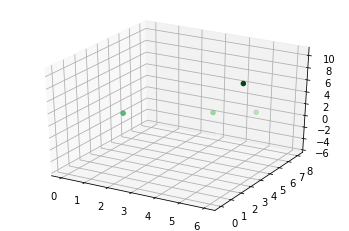

In [ ]:
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 12, 1)
xline = np.linspace(0, 7, 1)
yline = np.linspace(0, 8, 1)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
x1data = [3,4,5,6,2]
ydata = [8,5,7,3,1]
zdata = [predict_label([x1data[0],ydata[0]]),predict_label([x1data[1],ydata[1]]),
         predict_label([x1data[2],ydata[2]]),predict_label([x1data[3],ydata[3]]),
         predict_label([x1data[4],ydata[4]])]

ax.scatter3D(x1data, ydata, zdata, c=zdata, cmap='Greens');